In [10]:
import helpers
import numpy as np
import re
import math
from tqdm import tqdm
import copy
import networkx as nx
from collections import Counter
import ast
import itertools as it
from shapely.geometry import Polygon

data = """on x=-5..47,y=-31..22,z=-19..33
on x=-44..5,y=-27..21,z=-14..35
on x=-49..-1,y=-11..42,z=-10..38
on x=-20..34,y=-40..6,z=-44..1
off x=26..39,y=40..50,z=-2..11
on x=-41..5,y=-41..6,z=-36..8
off x=-43..-33,y=-45..-28,z=7..25
on x=-33..15,y=-32..19,z=-34..11
off x=35..47,y=-46..-34,z=-11..5
on x=-14..36,y=-6..44,z=-16..29
on x=-57795..-6158,y=29564..72030,z=20435..90618
on x=36731..105352,y=-21140..28532,z=16094..90401
on x=30999..107136,y=-53464..15513,z=8553..71215
on x=13528..83982,y=-99403..-27377,z=-24141..23996
on x=-72682..-12347,y=18159..111354,z=7391..80950
on x=-1060..80757,y=-65301..-20884,z=-103788..-16709
on x=-83015..-9461,y=-72160..-8347,z=-81239..-26856
on x=-52752..22273,y=-49450..9096,z=54442..119054
on x=-29982..40483,y=-108474..-28371,z=-24328..38471
on x=-4958..62750,y=40422..118853,z=-7672..65583
on x=55694..108686,y=-43367..46958,z=-26781..48729
on x=-98497..-18186,y=-63569..3412,z=1232..88485
on x=-726..56291,y=-62629..13224,z=18033..85226
on x=-110886..-34664,y=-81338..-8658,z=8914..63723
on x=-55829..24974,y=-16897..54165,z=-121762..-28058
on x=-65152..-11147,y=22489..91432,z=-58782..1780
on x=-120100..-32970,y=-46592..27473,z=-11695..61039
on x=-18631..37533,y=-124565..-50804,z=-35667..28308
on x=-57817..18248,y=49321..117703,z=5745..55881
on x=14781..98692,y=-1341..70827,z=15753..70151
on x=-34419..55919,y=-19626..40991,z=39015..114138
on x=-60785..11593,y=-56135..2999,z=-95368..-26915
on x=-32178..58085,y=17647..101866,z=-91405..-8878
on x=-53655..12091,y=50097..105568,z=-75335..-4862
on x=-111166..-40997,y=-71714..2688,z=5609..50954
on x=-16602..70118,y=-98693..-44401,z=5197..76897
on x=16383..101554,y=4615..83635,z=-44907..18747
off x=-95822..-15171,y=-19987..48940,z=10804..104439
on x=-89813..-14614,y=16069..88491,z=-3297..45228
on x=41075..99376,y=-20427..49978,z=-52012..13762
on x=-21330..50085,y=-17944..62733,z=-112280..-30197
on x=-16478..35915,y=36008..118594,z=-7885..47086
off x=-98156..-27851,y=-49952..43171,z=-99005..-8456
off x=2032..69770,y=-71013..4824,z=7471..94418
on x=43670..120875,y=-42068..12382,z=-24787..38892
off x=37514..111226,y=-45862..25743,z=-16714..54663
off x=25699..97951,y=-30668..59918,z=-15349..69697
off x=-44271..17935,y=-9516..60759,z=49131..112598
on x=-61695..-5813,y=40978..94975,z=8655..80240
off x=-101086..-9439,y=-7088..67543,z=33935..83858
off x=18020..114017,y=-48931..32606,z=21474..89843
off x=-77139..10506,y=-89994..-18797,z=-80..59318
off x=8476..79288,y=-75520..11602,z=-96624..-24783
on x=-47488..-1262,y=24338..100707,z=16292..72967
off x=-84341..13987,y=2429..92914,z=-90671..-1318
off x=-37810..49457,y=-71013..-7894,z=-105357..-13188
off x=-27365..46395,y=31009..98017,z=15428..76570
off x=-70369..-16548,y=22648..78696,z=-1892..86821
on x=-53470..21291,y=-120233..-33476,z=-44150..38147
off x=-93533..-4276,y=-16170..68771,z=-104985..-24507"""

with open("input_22.txt", 'r') as f:
    data = f.read()

data = data.lstrip()
data = data.rstrip()
    
    
#changeDict = {"forward": np.array([1,0]), "down": np.array([0,1]), "up": np.array([0,-1])}
data = re.findall("(\w+) x=([-+]?\d+)..([-+]?\d+),y=([-+]?\d+)..([-+]?\d+),z=([-+]?\d+)..([-+]?\d+)", data)
#data = [x.rstrip() for x in data.split("\n\n") if x]
data


[('on', '-30', '22', '-28', '20', '-17', '37'),
 ('on', '-20', '34', '-30', '17', '-30', '21'),
 ('on', '-7', '42', '-23', '26', '-18', '29'),
 ('on', '-8', '44', '-34', '20', '-14', '32'),
 ('on', '-13', '32', '-47', '6', '-38', '6'),
 ('on', '-48', '6', '-36', '14', '-18', '33'),
 ('on', '-31', '13', '-22', '32', '-44', '9'),
 ('on', '-18', '31', '-48', '-2', '-18', '28'),
 ('on', '-9', '38', '-15', '35', '-48', '6'),
 ('on', '-14', '35', '-42', '6', '-9', '43'),
 ('off', '25', '40', '-21', '-12', '3', '18'),
 ('on', '-32', '12', '-28', '18', '-12', '40'),
 ('off', '-12', '1', '27', '38', '5', '18'),
 ('on', '-34', '14', '-38', '13', '-29', '23'),
 ('off', '9', '28', '-35', '-26', '7', '16'),
 ('on', '-18', '27', '-21', '27', '-42', '7'),
 ('off', '18', '32', '26', '42', '-8', '10'),
 ('on', '-15', '34', '-30', '17', '-19', '33'),
 ('off', '12', '23', '32', '45', '26', '41'),
 ('on', '-36', '13', '-33', '13', '-27', '17'),
 ('on', '-8328', '22599', '-70363', '-44520', '-57360', '-369

In [12]:
coords = set()
cubes = []
polygons = []
for x in tqdm(data):
    opp, x1, x2, y1, y2, z1, z2 = x
    x1,x2,y1,y2,z1,z2 = int(x1),int(x2),int(y1),int(y2),int(z1),int(z2)
    x_dim = x2-x1 + 1
    y_dim = y2-y1 + 1
    z_dim = z2-z1 + 1
    #print(x_dim, y_dim, z_dim)
    cubes.append([opp, (x_dim,y_dim,z_dim),(x1,y1,z1), (x2,y2,z2)])
    #polygons.append(Polygon(((x1,y1,z1), (x1,y1,z2), (x1,y2,z1), (x1,y2,z2), (x2,y1,z1), (x2,y1,z2), (x2,y2,z1), (x2,y2,z2))))


100%|████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<?, ?it/s]


In [13]:
cubes

[['on', (3, 3, 3), (10, 10, 10), (12, 12, 12)],
 ['on', (3, 3, 3), (11, 11, 11), (13, 13, 13)],
 ['off', (3, 3, 3), (9, 9, 9), (11, 11, 11)],
 ['on', (1, 1, 1), (10, 10, 10), (10, 10, 10)]]

In [ ]:
def overlap(c1,c2):
    c1_start = c1[0]
    c1_end = c1[1]
    c2_start = c2[0]
    c2_end = c2[1]
    for i in [0,1,2]:
        if c1_start[i]

In [14]:
for pol in polygons:
    print(pol.area)

0.0
0.0
0.0
0.0


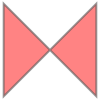

In [15]:
polygons[0]

In [ ]:
def overlap():
    max(min(a',x')-max(a,x),0) * max(min(b',y')-max(b,y),0) * max(min(c',z')-max(c,z),0)

In [31]:
len(coords)
#range(-10,10)

503864

In [13]:
import numpy as np, parse

#cubes = {((int(x),int(X)+1),(int(y),int(Y)+1),(int(z),int(Z)+1)): s=='on' for s,x,X,y,Y,z,Z in data}
cubes = {((x,X+1),(y,Y+1),(z,Z+1)): s=='on' for s,x,X,y,Y,z,Z in 
    parse.findall('{:l} x={:d}..{:d},y={:d}..{:d},z={:d}..{:d}',
    open("input_22.txt").read())}

xs, ys, zs = map(np.unique, zip(*cubes))
xs = xs.astype('float64')
xd, yd, zd = map(np.diff, [xs, ys, zs])
sizes = np.einsum('i, j, k', xd,yd,zd)
state = np.zeros(sizes.shape, bool)

f = lambda x,xs: slice(*np.searchsorted(x,xs))
for (x, y, z), s in cubes.items():
    state[f(xs,x), f(ys,y), f(zs,z)] = s

print((state*sizes).sum())

[-96548 -95501 -94741 -94694 -92225 -91660 -91298 -91215 -90084 -88908
 -88042 -87964 -87661 -87039 -85843 -84964 -84658 -82922 -82275 -82085
 -81567 -81288 -80843 -80255 -80081 -79009 -78973 -78873 -78815 -78385
 -78157 -78098 -77689 -77369 -77282 -77202 -77037 -76830 -76606 -76096
 -75821 -75647 -75444 -74700 -74533 -72345 -72324 -71895 -71801 -71560
 -71366 -71046 -70594 -70565 -69619 -68894 -68656 -68434 -68345 -68308
 -67938 -67818 -67761 -67703 -67083 -67048 -66878 -66640 -66455 -66279
 -66218 -66042 -65641 -65525 -65489 -65002 -64986 -64690 -64522 -64472
 -63807 -63474 -63453 -63368 -62723 -62388 -62353 -61946 -61932 -61883
 -61835 -61658 -61379 -61308 -61047 -60990 -60703 -60646 -60589 -60106
 -60097 -60065 -59075 -59020 -58628 -58593 -58188 -58123 -58015 -57779
 -57715 -57423 -57089 -56800 -56622 -56082 -55992 -55888 -55882 -55795
 -55629 -55391 -55074 -54668 -53867 -53558 -53158 -52617 -52574 -51690
 -51414 -51272 -51261 -51159 -50897 -50844 -50740 -50684 -50580 -50210
 -5019